In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

from src.data import get_zipf_frequencies, get_words, solutions_path, guesses_path
from src.solver import entropy
from src.wordle import check_word

# Word frequencies

In [3]:
zipf_frequencies = get_zipf_frequencies(get_words(solutions_path))

0it [00:00, ?it/s]

3158it [00:00, 15822.74it/s]


In [4]:
len(zipf_frequencies)

3158

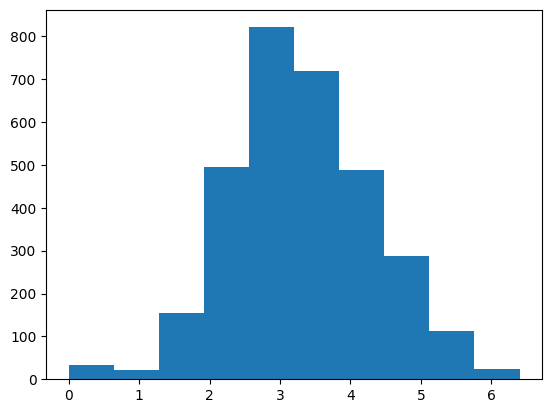

In [6]:
plt.hist(zipf_frequencies.values())

In [7]:
sorted_words = sorted(zipf_frequencies, key=zipf_frequencies.get)
sorted_frequencies = [zipf_frequencies[word] for word in sorted_words]
sorted_words_and_frequencies = list(zip(sorted_words, sorted_frequencies))

In [8]:
sorted_words_and_frequencies[:20]

[('aboil', 0.0),
 ('befog', 0.0),
 ('besot', 0.0),
 ('bilgy', 0.0),
 ('brusk', 0.0),
 ('cawed', 0.0),
 ('fogie', 0.0),
 ('gibed', 0.0),
 ('gloam', 0.0),
 ('hiree', 0.0),
 ('hulky', 0.0),
 ('ivied', 0.0),
 ('japed', 0.0),
 ('kvell', 0.0),
 ('laved', 0.0),
 ('luted', 0.0),
 ('meshy', 0.0),
 ('miasm', 0.0),
 ('moper', 0.0),
 ('ogler', 0.0)]

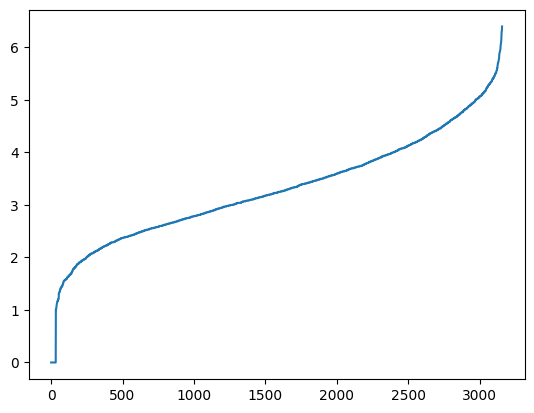

In [36]:
plt.plot(sorted_frequencies)

In [9]:
sorted_words_and_frequencies[1490:1510]

[('hilly', 3.17),
 ('leech', 3.17),
 ('madly', 3.17),
 ('nerdy', 3.17),
 ('nifty', 3.17),
 ('shawl', 3.17),
 ('valet', 3.17),
 ('bagel', 3.18),
 ('bigot', 3.18),
 ('bumpy', 3.18),
 ('codex', 3.18),
 ('facet', 3.18),
 ('firth', 3.18),
 ('floss', 3.18),
 ('locus', 3.18),
 ('posse', 3.18),
 ('saber', 3.18),
 ('samba', 3.18),
 ('slant', 3.18),
 ('spelt', 3.18)]

In [10]:
sorted_words_and_frequencies[-20:]

[('great', 5.88),
 ('world', 5.89),
 ('those', 5.9),
 ('never', 5.91),
 ('still', 5.92),
 ('going', 5.94),
 ('being', 5.95),
 ('right', 5.96),
 ('where', 6.0),
 ('these', 6.04),
 ('could', 6.06),
 ('think', 6.08),
 ('after', 6.11),
 ('first', 6.11),
 ('other', 6.16),
 ('would', 6.27),
 ('which', 6.3),
 ('there', 6.31),
 ('their', 6.33),
 ('about', 6.4)]

In [11]:
sorted_frequencies = np.array(sorted_frequencies)

In [12]:
sigmoid_freq = 1 / (1 + np.exp(-sorted_frequencies))

In [15]:
probs = sigmoid_freq / np.sum(sigmoid_freq)

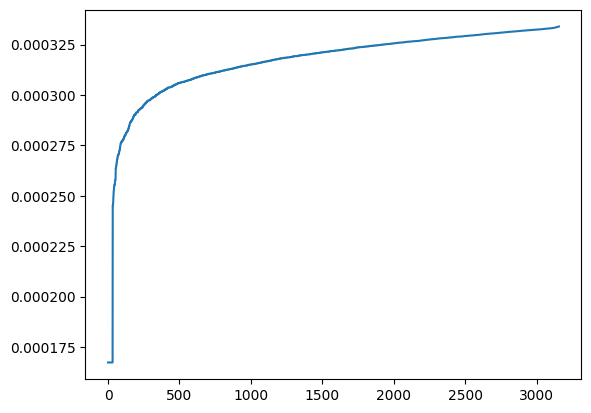

In [16]:
plt.plot(probs)

In [18]:
np.where(probs > 0.9 * probs[-1])

(array([ 356,  357,  358, ..., 3155, 3156, 3157]),)

In [20]:
356 / 3158

0.11272957568081064

In [19]:
probs[-1] / probs[1]

1.996682397839651

# Entropy

In [23]:
entropy(probs)

11.621307008550616

# Calculate guesses

In [5]:
solutions = get_words(solutions_path)

In [6]:
for solution in tqdm(solutions, total=3158):
    guesses = get_words(guesses_path)
    for guess in guesses:
        check_word(guess, solution)

  0%|          | 0/3158 [00:00<?, ?it/s]